# Etude des corrélations entre les données en vent à différents endroits

### Chargement des packages et choix des options

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

### Récupération des données

In [12]:
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)
data_hAgen_wind,data_dAgen_wind=regroupement_data(data_path+'Data_Agen/Wind_power_default/',1980,2022)
data_hMontpellier_wind,data_dMontpellier_wind=regroupement_data(data_path+'Data_Montpellier/Wind_power_default/',1980,2022)
data_hPerpignan_wind,data_dPerpignan_wind=regroupement_data(data_path+'Data_Perpignan/Wind_power_default/',1980,2022)
data_hBordeaux_wind,data_dBordeaux_wind=regroupement_data(data_path+'Data_Bordeaux/Wind_power_default/',1980,2022)

Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes


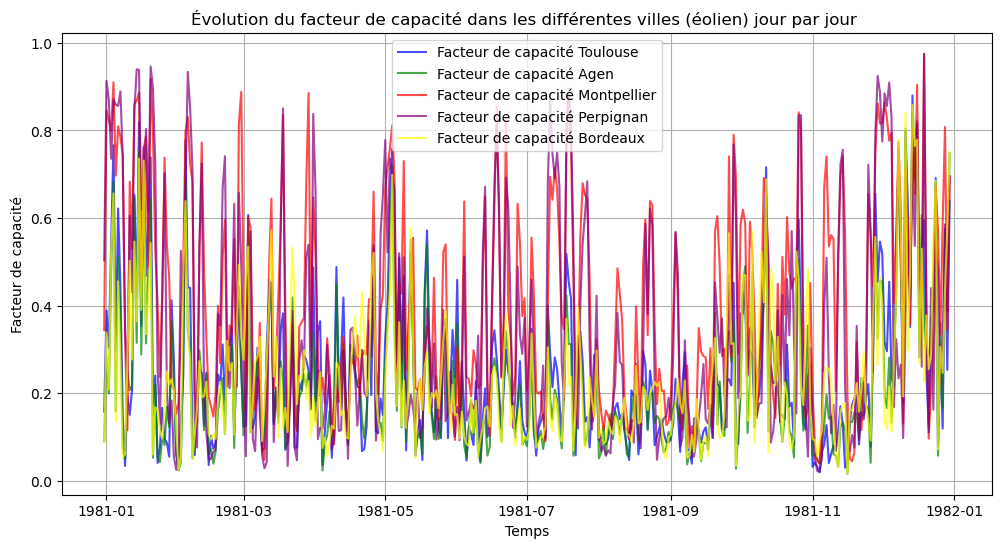

In [13]:
# Affichage des données dans les différentes villes sur 1 an pour voir "à l'oeil" les écarts
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_wind.index[365:730], data_dToulouse_wind['electricity'][365:730], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(data_dAgen_wind.index[365:730], data_dAgen_wind['electricity'][365:730], label='Facteur de capacité Agen', color='green', alpha=0.7)
plt.plot(data_dMontpellier_wind.index[365:730], data_dMontpellier_wind['electricity'][365:730], label='Facteur de capacité Montpellier', color='red', alpha=0.7)
plt.plot(data_dPerpignan_wind.index[365:730], data_dPerpignan_wind['electricity'][365:730], label='Facteur de capacité Perpignan', color='purple', alpha=0.7)
plt.plot(data_dBordeaux_wind.index[365:730], data_dBordeaux_wind['electricity'][365:730], label='Facteur de capacité Bordeaux', color='yellow', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

Hypothèse : Agen et Toulouse et Bordeaux ont l'air assez corrélés, Montpellier et Perpignan assez corrélés aussi

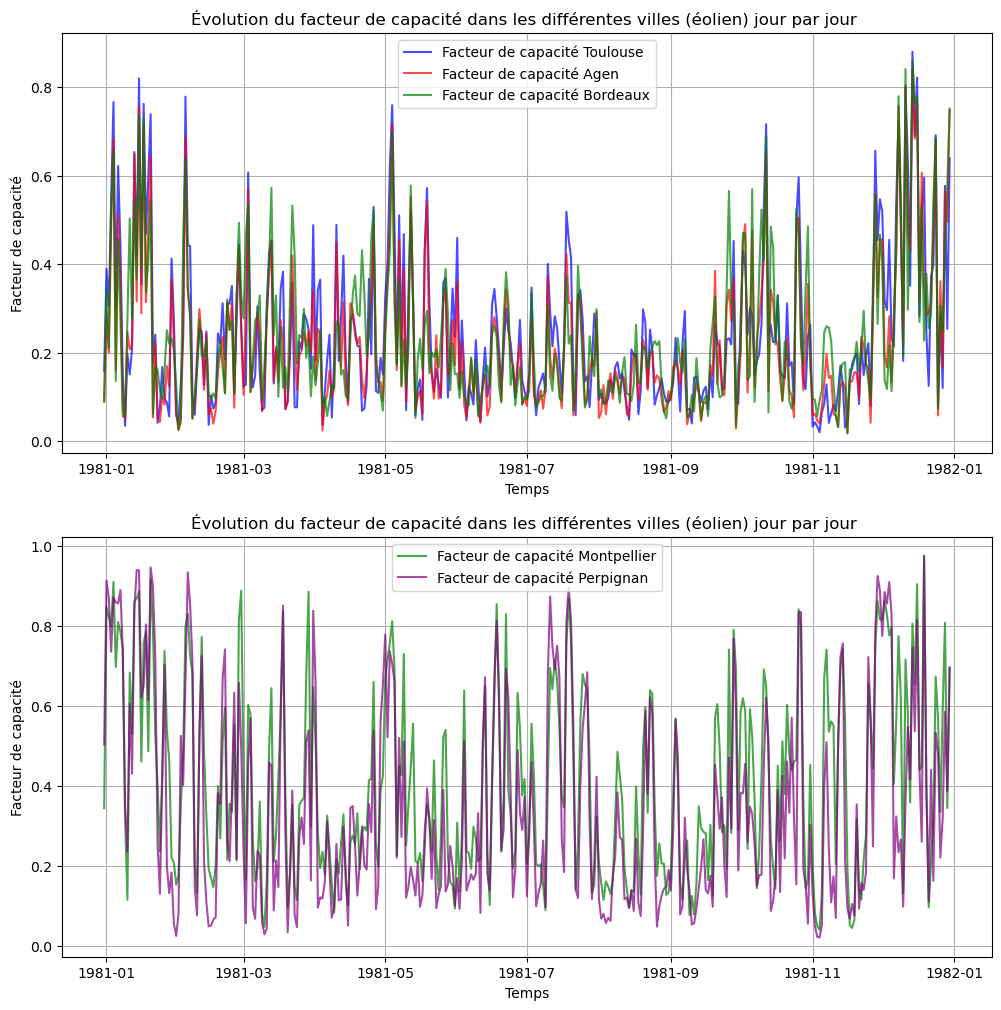

In [14]:
# Affichage des données dans les différentes villes sur 1 an pour voir "à l'oeil" les écarts
plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.plot(data_dToulouse_wind.index[365:730], data_dToulouse_wind['electricity'][365:730], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(data_dAgen_wind.index[365:730], data_dAgen_wind['electricity'][365:730], label='Facteur de capacité Agen', color='red', alpha=0.7)
plt.plot(data_dBordeaux_wind.index[365:730], data_dBordeaux_wind['electricity'][365:730], label='Facteur de capacité Bordeaux', color='green', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(data_dMontpellier_wind.index[365:730], data_dMontpellier_wind['electricity'][365:730], label='Facteur de capacité Montpellier', color='green', alpha=0.7)
plt.plot(data_dPerpignan_wind.index[365:730], data_dPerpignan_wind['electricity'][365:730], label='Facteur de capacité Perpignan', color='purple', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

Pas très lisible, on va essayer maintenant de faire une étude des corrélations.

## Etude des corrélations

In [16]:
#On créer le dataframe data1
data_all = pd.concat([data_dToulouse_wind['electricity'],data_dAgen_wind['electricity'],data_dBordeaux_wind['electricity'],data_dMontpellier_wind['electricity'],data_dPerpignan_wind['electricity']],axis=1)
#On utilise .shift sur les donénes de loading_pca car les données démarrent à 0, alors que data1 démarre à 1.
data_all.columns=["Toulouse","Agen","Bordeaux","Montpellier","Perpignan"]
print(data_all.head())

#On construit une matrice de corrélation avec des valeurs d'abord

cormat_all = data_all.corr()
round(cormat_all,2)


            Toulouse      Agen  Bordeaux  Montpellier  Perpignan
time                                                            
1980-01-01  0.274292  0.212792  0.261042     0.135125   0.204667
1980-01-02  0.334875  0.255958  0.186958     0.647583   0.724042
1980-01-03  0.023708  0.073208  0.142375     0.372750   0.334917
1980-01-04  0.063042  0.175958  0.274042     0.114458   0.087708
1980-01-05  0.434917  0.388792  0.367083     0.426458   0.508708


,Toulouse,Agen,Bordeaux,Montpellier,Perpignan
Toulouse,1.00,0.91,0.67,0.56,0.55
Agen,0.91,1.00,0.87,0.45,0.37
Bordeaux,0.67,0.87,1.00,0.36,0.23
Montpellier,0.56,0.45,0.36,1.00,0.87
Perpignan,0.55,0.37,0.23,0.87,1.00
